In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout,BatchNormalization, Flatten,Dense
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import random 
import tensorflow as tf

In [2]:
import glob

In [3]:
train_files = glob.glob("./chest_xray/train/*/**.jpeg")

In [4]:
len(train_files)
train_files[0]

'./chest_xray/train\\NORMAL\\IM-0115-0001.jpeg'

In [5]:
from random import shuffle
shuffle(train_files)
# train_files

In [6]:
X_train = np.zeros((len(train_files),128,128))
Y_train = np.zeros((len(train_files),1))

In [7]:
#For Normal label is 0 for bacterial - 1 and for virus - 1
for i in range(len(train_files)):
    temp = Image.open(train_files[i])
    temp = temp.resize((128,128),0)
    temp = ImageOps.grayscale(temp)
    numpy_temp = np.array(temp)
#     numpy_temp = np.resize(numpy_temp,(128,128,1))
    X_train[i,:,:] = numpy_temp
    temp1 = train_files[i].split('\\')[1]
    if(temp1=='NORMAL'): Y_train[i] = 0
    else:
        temp2 = train_files[i].split('\\')[2].split('_')[1]
        if(temp2=='bacteria'): Y_train[i] = 1
        else : Y_train[i] =2
# numpy_temp.shape

In [8]:
X_train = X_train/255

In [9]:
X_train.shape
# train_files[0]

(5216, 128, 128)

In [10]:
Y_train[0]

array([2.])

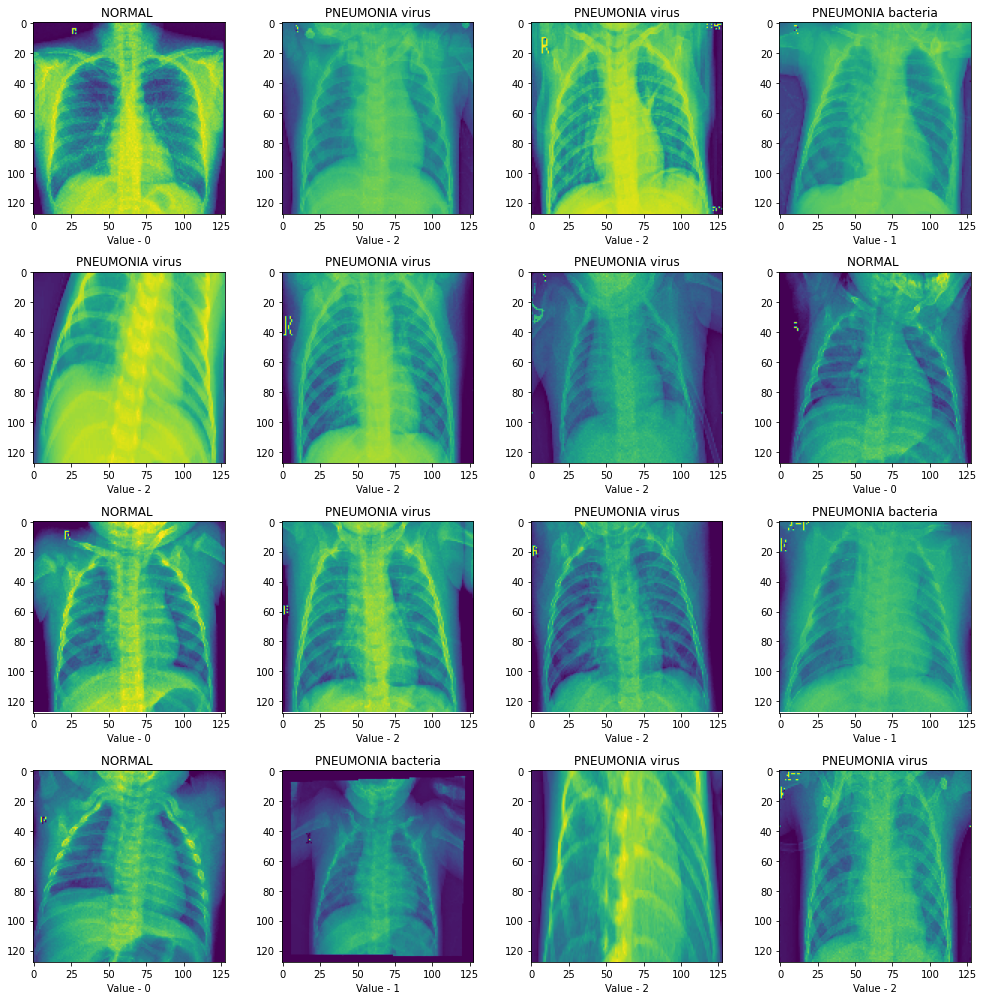

In [12]:
# Some Samples
plt.figure(figsize=(14,14))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    temp = random.randint(0,X_train.shape[0]-1)
    temp2 = ''
    temp1 = train_files[temp].split("\\")[1]
    if( temp1=='PNEUMONIA'): 
        temp2 = train_files[temp].split("\\")[2].split("_")[1]
    plt.imshow(X_train[temp])
    plt.xlabel("Value - {0}".format(int(Y_train[temp])))
    plt.title("{0} {1}".format(temp1,temp2))
plt.tight_layout()

In [13]:
model = tf.keras.Sequential()

In [14]:
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128, 128,1)))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [18]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
163/163 [==============================] - 82s 488ms/step - loss: 1.1108 - accuracy: 0.6887
Epoch 2/5
163/163 [==============================] - 86s 527ms/step - loss: 0.5520 - accuracy: 0.7598
Epoch 3/5
163/163 [==============================] - 96s 588ms/step - loss: 0.5205 - accuracy: 0.7682
Epoch 4/5
163/163 [==============================] - 95s 583ms/step - loss: 0.5217 - accuracy: 0.7805
Epoch 5/5
163/163 [==============================] - 92s 563ms/step - loss: 0.4876 - accuracy: 0.7866


In [19]:
test_files = glob.glob("./chest_xray/test/*/**.jpeg")

In [20]:
shuffle(test_files)

In [21]:
len(test_files)

624

In [22]:
test_files[0]

'./chest_xray/test\\NORMAL\\NORMAL2-IM-0352-0001.jpeg'

In [23]:
X_test = np.zeros((len(test_files),128,128))
Y_test = np.zeros((len(test_files),1))

In [24]:
for i in range(len(test_files)):
    temp = Image.open(test_files[i])
    temp = temp.resize((128,128),0)
    temp = ImageOps.grayscale(temp)
    numpy_temp = np.array(temp)
    X_test[i,:,:] = numpy_temp
    temp1 = test_files[i].split('\\')[1]
    if(temp1=='NORMAL'): Y_test[i] = 0
    else:
        temp2 = test_files[i].split('\\')[2].split('_')[1]
        if(temp2=='bacteria'): Y_test[i] = 1
        else : Y_test[i] =2

In [25]:
X_test = X_test/255

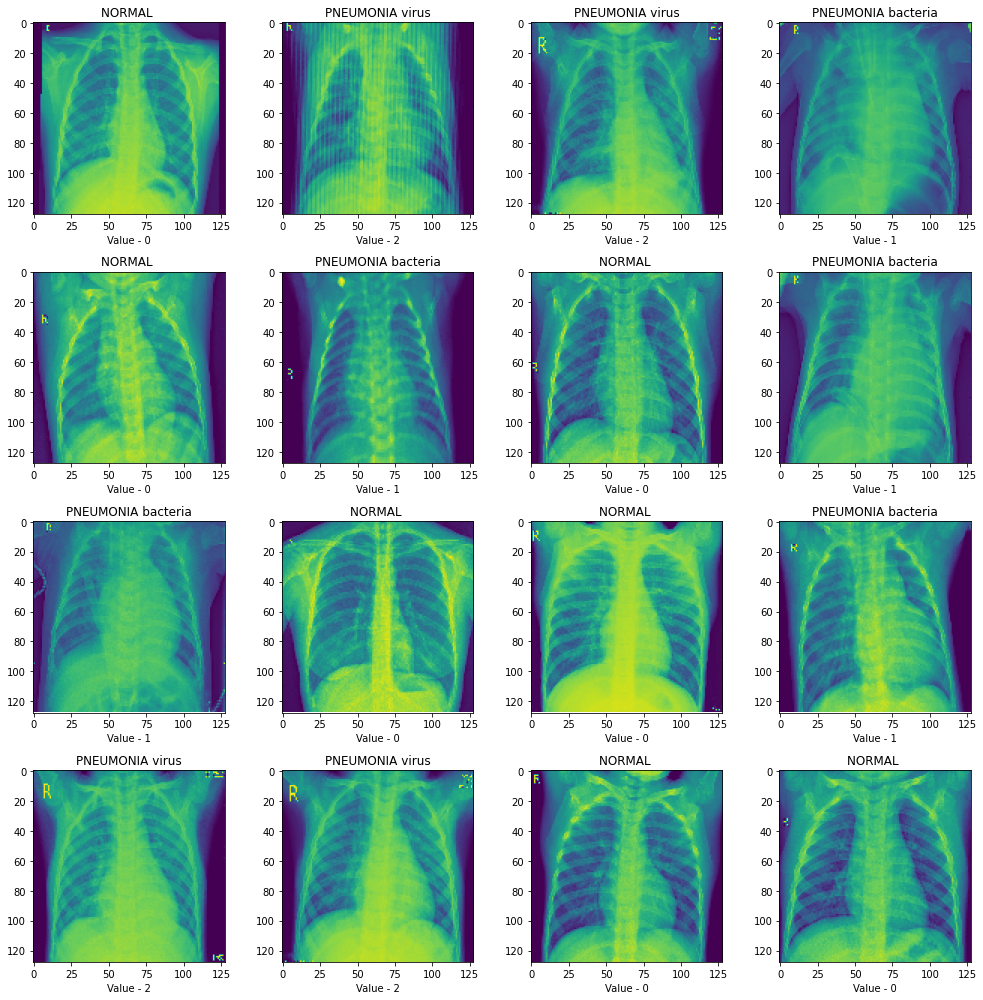

In [26]:
#testing data
plt.figure(figsize=(14,14))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    temp = random.randint(0,X_test.shape[0]-1)
    temp2 = ''
    temp1 = test_files[temp].split("\\")[1]
    if( temp1=='PNEUMONIA'): 
        temp2 = test_files[temp].split("\\")[2].split("_")[1]
    plt.imshow(X_test[temp])
    plt.xlabel("Value - {0}".format(int(Y_test[temp])))
    plt.title("{0} {1}".format(temp1,temp2))
plt.tight_layout()


In [56]:
X_test = np.reshape(X_test,(X_test.shape[0],128,128,1))

In [57]:
#evaluating model on test dataset
model.evaluate(X_test,Y_test,batch_size=624)

1/1 [==============================] - 2s 2s/step - loss: 1.0246 - accuracy: 0.7212


[1.0245500802993774, 0.7211538553237915]